## Regression Analysis on EPL match data using Pythegoreon Winning Percentage and Actual Winning Percentage.

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
EPL = pd.read_csv('EPL_Matches_93_22.csv')
EPL.head()

,Year,Team,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue,...,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth
0,1993,Arsenal,25,20,21,8,6,7,30,11.0,...,56,43,35,15,13,16,20.5,42,0.357143,0.601496
1,1993,Aston Villa,36,16,21,13,5,3,44,15.5,...,74,60,37,21,13,10,26.5,42,0.500000,0.724492
2,1993,Blackburn,38,18,21,13,4,4,43,15.0,...,71,66,48,20,11,11,25.5,42,0.476190,0.654054
3,1993,Chelsea,29,22,21,9,7,5,34,12.5,...,56,61,44,14,12,14,21.0,42,0.333333,0.657769
4,1993,Coventry City,29,28,21,7,4,10,25,9.0,...,48,56,49,12,9,15,18.0,39,0.307692,0.566372


## Data Preprocessing  Exploratory Data Analysis (EDA)

In [3]:
EPL.describe()

,Year,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue,Goals_against_h,...,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,...,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,2007.366337,28.971947,21.745875,19.051155,8.719472,4.919142,5.412541,31.077558,11.179043,28.858086,...,52.169967,57.830033,43.430693,14.112211,10.311881,14.108911,19.028878,38.054455,0.371048,0.635783
std,8.723169,9.236518,6.780729,0.802284,3.325412,2.042134,2.865256,9.154988,2.964340,7.904157,...,16.183835,8.833959,7.620827,5.645794,3.292881,5.314072,5.332924,1.413748,0.148898,0.094201
min,1993.000000,9.000000,4.000000,15.000000,1.000000,0.000000,0.000000,7.000000,3.000000,9.000000,...,11.000000,34.000000,25.000000,1.000000,1.000000,0.000000,5.000000,32.000000,0.026316,0.340631
25%,2000.000000,23.000000,17.000000,19.000000,6.000000,3.000000,3.000000,25.000000,9.000000,24.000000,...,41.000000,52.000000,38.000000,10.000000,8.000000,10.000000,15.500000,38.000000,0.263158,0.577952
50%,2007.000000,27.000000,21.000000,19.000000,8.000000,5.000000,5.000000,30.000000,11.000000,28.000000,...,49.000000,57.000000,43.000000,13.000000,10.000000,15.000000,18.000000,38.000000,0.342105,0.634522
75%,2015.000000,34.000000,26.000000,19.000000,11.000000,6.000000,7.000000,37.000000,13.000000,34.000000,...,62.000000,63.000000,48.000000,18.000000,12.000000,18.000000,22.500000,38.000000,0.459459,0.699969
max,2022.000000,68.000000,46.000000,21.000000,18.000000,10.000000,15.000000,55.000000,18.500000,55.000000,...,100.000000,87.000000,67.000000,32.000000,20.000000,29.000000,34.000000,42.000000,0.842105,0.863695


In [4]:
EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             606 non-null    int64  
 1   Team             606 non-null    object 
 2   Goals_for_h      606 non-null    int64  
 3   Goals_against_a  606 non-null    int64  
 4   GPh              606 non-null    int64  
 5   HW               606 non-null    int64  
 6   HD               606 non-null    int64  
 7   HL               606 non-null    int64  
 8   HPTS             606 non-null    int64  
 9   hwinvalue        606 non-null    float64
 10  Goals_against_h  606 non-null    int64  
 11  Goals_for_a      606 non-null    int64  
 12  GPa              606 non-null    int64  
 13  AW               606 non-null    int64  
 14  AD               606 non-null    int64  
 15  AL               606 non-null    int64  
 16  APTS             606 non-null    int64  
 17  awinvalue       

### Splitting the dataset into two decades (from 1993 - 2000 and 2001 - 2022)

In [5]:
#Extracting data between 1993 and 2000
_93_2000 = EPL[(EPL['Year'] >= 1993) & (EPL['Year'] <= 2000)]

In [6]:
#Extracting data between 2001 and 2022
_2001_2022 = EPL[(EPL['Year'] >= 2001) & (EPL['Year'] <= 2022)]
_2001_2022.head()

,Year,Team,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue,...,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth
166,2001,Arsenal,45,13,19,15,3,1,48,16.5,...,70,70,31,20,8,8,25.0,38,0.526316,0.836035
167,2001,Aston Villa,27,20,19,8,8,3,32,12.0,...,54,50,39,13,13,10,20.5,38,0.342105,0.621736
168,2001,Bradford City,20,29,19,4,7,8,19,7.5,...,26,61,39,5,8,22,10.5,38,0.131579,0.709844
169,2001,Charlton Ath,31,19,19,11,5,3,38,13.5,...,52,69,38,14,8,14,19.0,38,0.368421,0.767284
170,2001,Chelsea,44,20,19,13,3,3,42,14.5,...,61,69,44,17,7,11,22.0,38,0.447368,0.710915


In [7]:
_93_2000.shape

(166, 28)

In [8]:
#Dropping unwanted variables
_93_2000 = _93_2000.drop(['win_pct', 'pyth'], axis = 1)

In [9]:
#Dropping unwanted variables
_2001_2022 = _2001_2022.drop(['win_pct', 'pyth'], axis=1)

In [10]:
#Data Aggregation for 1993- 2000 data
EPL_93 = _93_2000.groupby(['Team'])['PTS', 'GF', 'GA', 'W', 'D', 'L',
'WV', 'GP'].sum().reset_index()

In [11]:
#Data Aggregation for 2001 - 2022 data
EPL_2001_2022 = _2001_2022.groupby(['Team'])['PTS', 'GF', 'GA', 'W', 'D', 'L',
                                    'WV', 'GP'].sum().reset_index()

In [12]:
#Creating new variables for winning percentages
EPL_93['win_pct'] = EPL_93['W'] / EPL_93['GP']
EPL_93['pyth_win_pct']  = EPL_93['GF'] ** 2 / (EPL_93['GF'] ** 2 + EPL_93['GA'] ** 2)

In [13]:
#Creating new variables for winning percentages
EPL_2001_2022['win_pct'] = EPL_2001_2022['W'] / EPL_2001_2022['GP']
EPL_2001_2022['pyth_win_pct'] = EPL_2001_2022['GF'] ** 2 / (EPL_2001_2022['GF'] ** 2 + EPL_2001_2022['GA'] ** 2)
EPL_2001_2022.head()

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
0,Arsenal,1596,1388,1029,468,273,168,564.0,828,0.565217,0.645325
1,Aston Villa,879,1032,832,223,200,286,328.0,719,0.310153,0.606075
2,Birmingham City,298,380,250,72,68,109,113.0,263,0.273764,0.697922
3,Blackburn,524,635,468,138,113,166,193.0,414,0.333333,0.648012
4,Blackpool,33,71,59,8,8,19,12.5,36,0.222222,0.591528


In [14]:
EPL_93.describe()

,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,266.515152,298.333333,215.060606,70.515152,53.242424,70.515152,98.000000,196.000000,0.322701,0.657923
std,178.383211,164.437805,116.260736,50.147982,32.019555,36.052151,64.231393,108.555285,0.098126,0.047878
min,24.000000,53.000000,39.000000,5.000000,5.000000,17.000000,9.000000,36.000000,0.121951,0.513331
25%,98.000000,141.000000,98.000000,26.000000,22.000000,39.000000,36.000000,82.000000,0.263158,0.632219
50%,232.000000,280.000000,231.000000,59.000000,53.000000,75.000000,87.000000,193.000000,0.306878,0.659644
75%,413.000000,462.000000,320.000000,108.000000,83.000000,95.000000,152.500000,308.000000,0.368750,0.689613
max,657.000000,518.000000,374.000000,193.000000,116.000000,141.000000,232.000000,315.000000,0.620579,0.735294


In [15]:
EPL_2001_2022.describe()

,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,518.636364,572.727273,436.863636,141.477273,102.090909,141.431818,188.579545,377.113636,0.316106,0.628477
std,493.005358,426.581782,319.964503,144.887364,87.079172,81.753002,174.301961,269.358343,0.112477,0.039674
min,26.000000,54.000000,39.000000,5.000000,8.000000,18.000000,10.500000,36.000000,0.131579,0.557841
25%,158.000000,223.250000,194.000000,38.750000,33.250000,75.000000,59.625000,170.250000,0.249984,0.599097
50%,324.500000,426.000000,342.000000,85.500000,72.000000,141.000000,120.250000,299.000000,0.297205,0.630471
75%,651.500000,843.250000,618.750000,165.500000,127.500000,173.500000,243.000000,566.250000,0.340824,0.647574
max,1684.000000,1388.000000,1029.000000,503.000000,310.000000,306.000000,590.500000,831.000000,0.606755,0.709844


In [16]:
EPL_93.head()

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
0,Arsenal,516,402,304,142,102,75,187.0,307,0.462541,0.636186
1,Aston Villa,462,412,318,126,94,98,168.0,308,0.409091,0.626667
2,Barnsley,35,72,47,10,7,23,12.5,38,0.263158,0.701204
3,Blackburn,437,427,292,121,64,82,158.0,277,0.436823,0.681367
4,Bolton,65,114,87,16,16,39,24.5,72,0.222222,0.631947


In [17]:
EPL_2001_2022.head()

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
0,Arsenal,1596,1388,1029,468,273,168,564.0,828,0.565217,0.645325
1,Aston Villa,879,1032,832,223,200,286,328.0,719,0.310153,0.606075
2,Birmingham City,298,380,250,72,68,109,113.0,263,0.273764,0.697922
3,Blackburn,524,635,468,138,113,166,193.0,414,0.333333,0.648012
4,Blackpool,33,71,59,8,8,19,12.5,36,0.222222,0.591528


### Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Correlation Coffiecent Matrix for 1993 to 2000 Season')

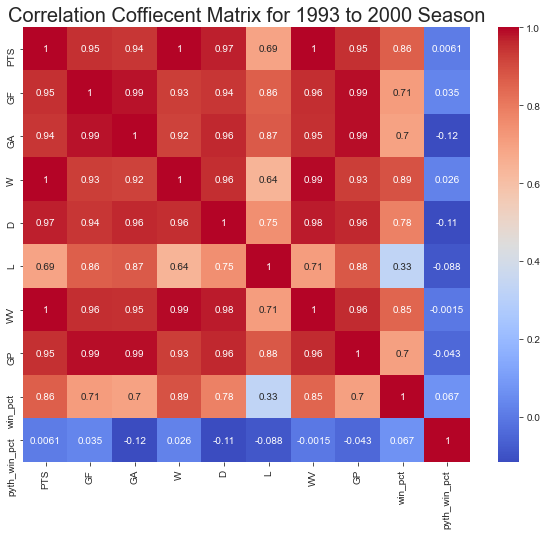

In [18]:
#Correlation Matrix for data from 1993 to 2000
sns.set_style("whitegrid")
sns.set_style("ticks" , {"xtick.major.size" : 8, "ytick.major.size":8})
plt.figure(figsize = (10, 8))
sns.heatmap(EPL_93.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Coffiecent Matrix for 1993 to 2000 Season', fontsize = 20)

Text(0, 0.5, 'Pythogorean Winning Percentge')

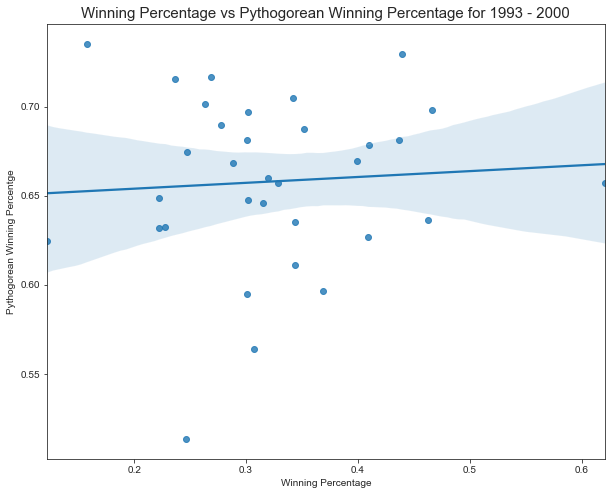

In [19]:
#Scatterplot between win percentages and pyth. win percentage
plt.figure(figsize=(10, 8))
sns.regplot(x='win_pct', y='pyth_win_pct', data=EPL_93)
plt.title('Winning Percentage vs Pythogorean Winning Percentage for 1993 - 2000', fontsize = 15)
plt.xlabel('Winning Percentage', fontsize = 10)
plt.ylabel('Pythogorean Winning Percentge', fontsize = 10)

Text(0.5, 1.0, 'Correlation Coffiecent Matrix for 2001 to 2022 Season')

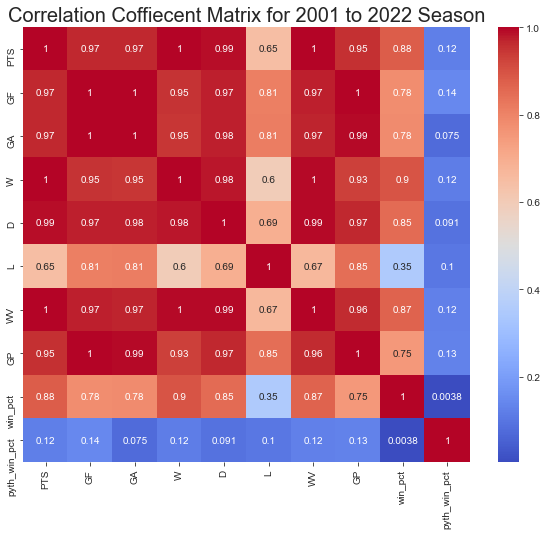

In [20]:
#Correlation Matrix for data from 1993 to 2000
plt.figure(figsize = (10, 8))
sns.heatmap(EPL_2001_2022.corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Coffiecent Matrix for 2001 to 2022 Season', fontsize=20)

Text(0, 0.5, 'Pythogorean Winning Percentge')

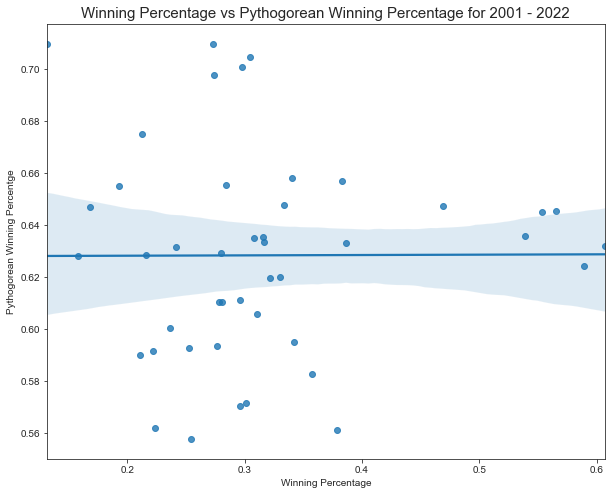

In [21]:
#Scatterplot between win percentages and pyth. win percentage
plt.figure(figsize = (10, 8))
sns.regplot(x = 'win_pct', y = 'pyth_win_pct', data = EPL_2001_2022)
plt.title(
    'Winning Percentage vs Pythogorean Winning Percentage for 2001 - 2022', fontsize=15)
plt.xlabel('Winning Percentage', fontsize=10)
plt.ylabel('Pythogorean Winning Percentge', fontsize=10)

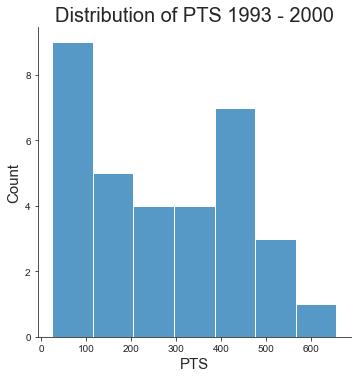

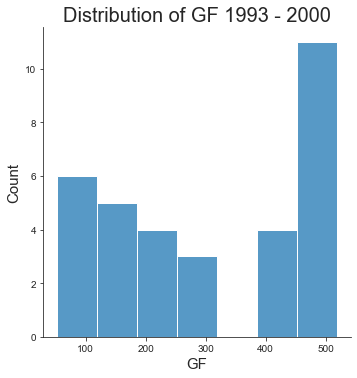

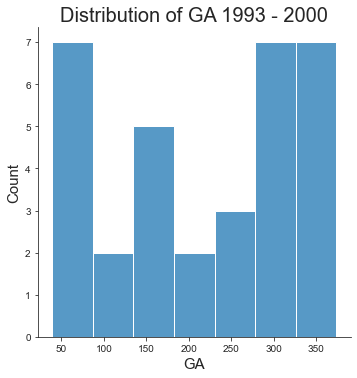

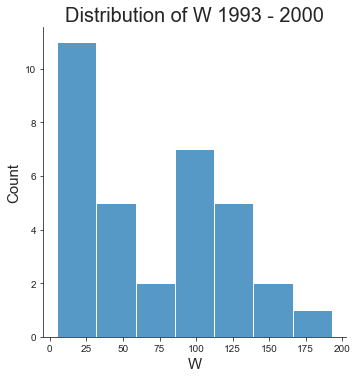

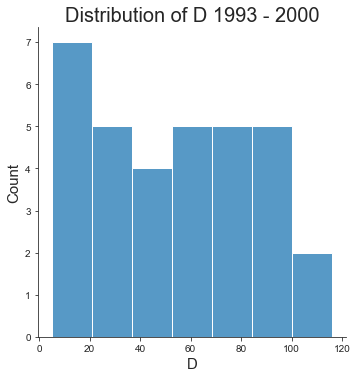

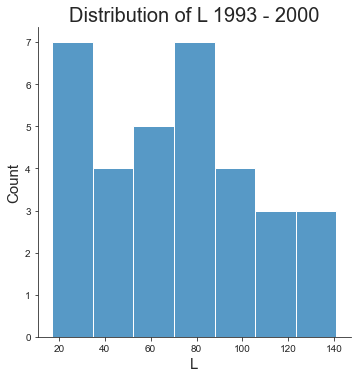

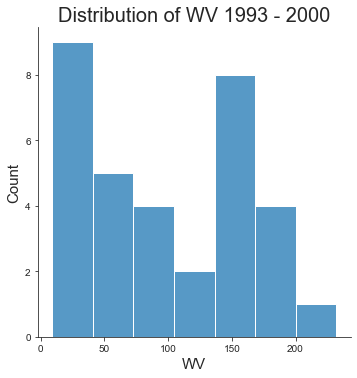

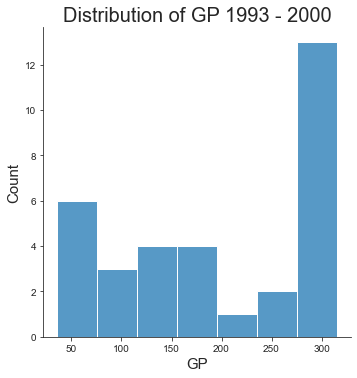

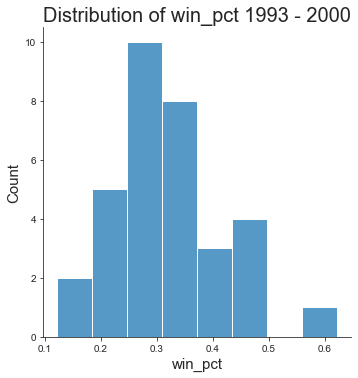

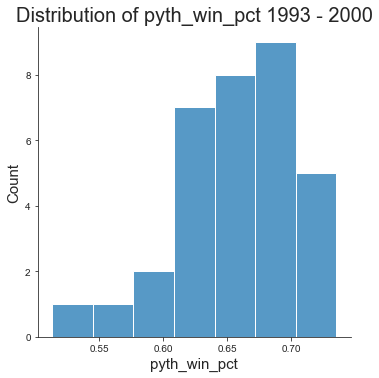

In [22]:
#Distributions of values
for feat in EPL_93.columns:
    if feat != 'Team':
        sns.displot(EPL_93[feat])
        plt.title(f"Distribution of {feat} 1993 - 2000", fontsize=20)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('Count', fontsize=15)

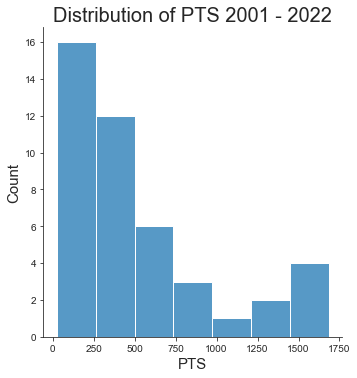

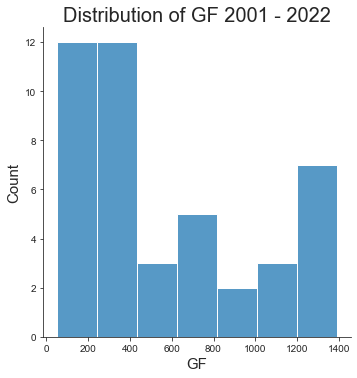

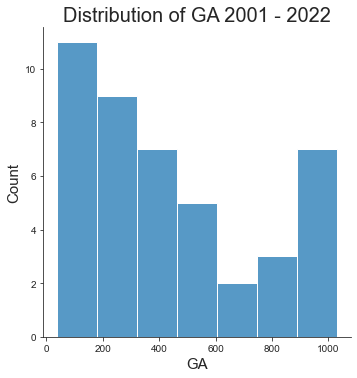

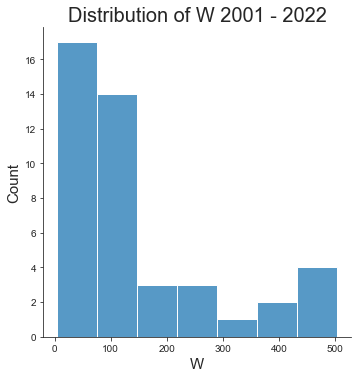

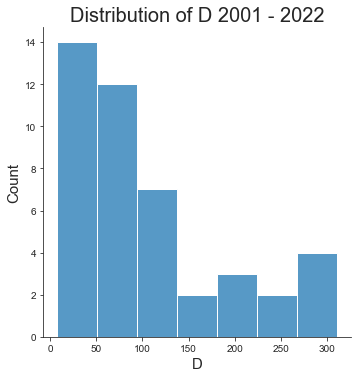

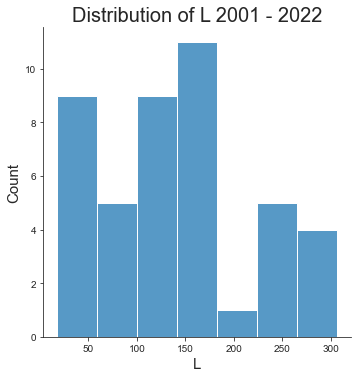

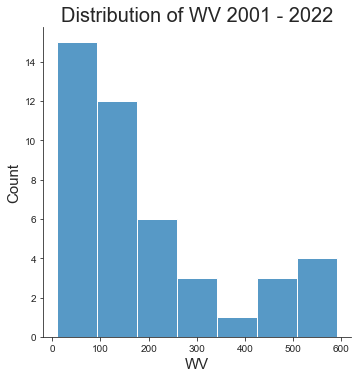

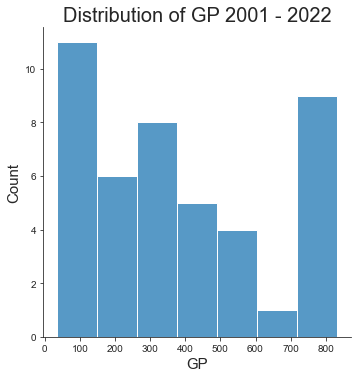

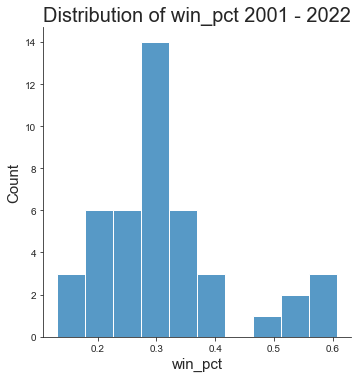

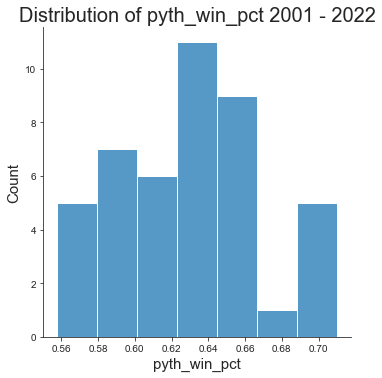

In [23]:
# Distributions of values
for feat in EPL_93.columns:
    if feat != 'Team':
        sns.displot(EPL_2001_2022[feat])
        plt.title(f"Distribution of {feat} 2001 - 2022", fontsize=20)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('Count', fontsize=15)

In [24]:
#Top 10 teams with the highest Winning Percentage
EPL_93.sort_values(by = 'win_pct', ascending = False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
17,Manchester Utd,657,518,374,193,116,40,232.0,311,0.620579,0.657335
15,Liverpool,512,499,328,144,82,85,184.0,309,0.466019,0.698294
0,Arsenal,516,402,304,142,102,75,187.0,307,0.462541,0.636186
19,Newcastle Utd,428,463,282,119,69,81,154.5,271,0.439114,0.729412
3,Blackburn,437,427,292,121,64,82,158.0,277,0.436823,0.681367
13,Leeds United,478,462,318,129,84,95,174.5,315,0.409524,0.678531
1,Aston Villa,462,412,318,126,94,98,168.0,308,0.409091,0.626667
7,Chelsea,470,464,326,125,93,93,172.5,313,0.399361,0.669511
23,QPR,216,242,199,59,43,62,78.5,160,0.368750,0.596587
31,West Ham,350,408,275,94,63,105,128.0,267,0.352060,0.687615


In [25]:
# Top 10 teams with the low Winning Percentage
EPL_93.sort_values(by='win_pct', ascending=True).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
28,Swindon Town,30,80,62,5,8,21,12.5,41,0.121951,0.624756
30,Watford,24,70,42,6,5,26,9.0,38,0.157895,0.735294
4,Bolton,65,114,87,16,16,39,24.5,72,0.222222,0.631947
6,Charlton Ath,35,53,39,8,11,17,13.5,36,0.222222,0.648730
12,Ipswich Town,122,177,135,28,30,57,47.0,123,0.227642,0.632219
5,Bradford City,36,65,41,9,11,20,13.5,38,0.236842,0.715374
9,Crystal Palace,127,152,148,30,36,55,48.5,122,0.245902,0.513331
22,Oldham Athletic,82,141,98,20,20,39,31.0,81,0.246914,0.674275
2,Barnsley,35,72,47,10,7,23,12.5,38,0.263158,0.701204
24,Sheffield Utd,93,124,78,22,22,33,35.5,82,0.268293,0.716496


In [26]:
# Top 10 teams with most points
EPL_93.sort_values(by='PTS', ascending=False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
17,Manchester Utd,657,518,374,193,116,40,232.0,311,0.620579,0.657335
0,Arsenal,516,402,304,142,102,75,187.0,307,0.462541,0.636186
15,Liverpool,512,499,328,144,82,85,184.0,309,0.466019,0.698294
13,Leeds United,478,462,318,129,84,95,174.5,315,0.409524,0.678531
7,Chelsea,470,464,326,125,93,93,172.5,313,0.399361,0.669511
1,Aston Villa,462,412,318,126,94,98,168.0,308,0.409091,0.626667
3,Blackburn,437,427,292,121,64,82,158.0,277,0.436823,0.681367
19,Newcastle Utd,428,463,282,119,69,81,154.5,271,0.439114,0.729412
29,Tottenham,413,469,374,108,87,117,152.5,314,0.343949,0.611280
32,Wimbledon,390,489,362,99,83,122,145.5,314,0.315287,0.645985


In [27]:
# Top 10 teams with most goals
EPL_93.sort_values(by='GF', ascending=False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
17,Manchester Utd,657,518,374,193,116,40,232.0,311,0.620579,0.657335
26,Southampton,353,505,333,93,64,141,130.0,308,0.301948,0.696953
15,Liverpool,512,499,328,144,82,85,184.0,309,0.466019,0.698294
25,Sheffield Weds,387,497,357,100,87,126,143.5,313,0.319489,0.659644
32,Wimbledon,390,489,362,99,83,122,145.5,314,0.315287,0.645985
29,Tottenham,413,469,374,108,87,117,152.5,314,0.343949,0.611280
7,Chelsea,470,464,326,125,93,93,172.5,313,0.399361,0.669511
19,Newcastle Utd,428,463,282,119,69,81,154.5,271,0.439114,0.729412
13,Leeds United,478,462,318,129,84,95,174.5,315,0.409524,0.678531
8,Coventry City,370,454,320,90,77,122,140.0,312,0.288462,0.668089


In [28]:
# Top 10 teams with most wins
EPL_93.sort_values(by='W', ascending=False).head(10)


,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
17,Manchester Utd,657,518,374,193,116,40,232.0,311,0.620579,0.657335
15,Liverpool,512,499,328,144,82,85,184.0,309,0.466019,0.698294
0,Arsenal,516,402,304,142,102,75,187.0,307,0.462541,0.636186
13,Leeds United,478,462,318,129,84,95,174.5,315,0.409524,0.678531
1,Aston Villa,462,412,318,126,94,98,168.0,308,0.409091,0.626667
7,Chelsea,470,464,326,125,93,93,172.5,313,0.399361,0.669511
3,Blackburn,437,427,292,121,64,82,158.0,277,0.436823,0.681367
19,Newcastle Utd,428,463,282,119,69,81,154.5,271,0.439114,0.729412
29,Tottenham,413,469,374,108,87,117,152.5,314,0.343949,0.611280
25,Sheffield Weds,387,497,357,100,87,126,143.5,313,0.319489,0.659644


In [29]:
# Top 10 teams with high pyth win pct
EPL_93.sort_values(by='pyth_win_pct', ascending=False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
30,Watford,24,70,42,6,5,26,9.0,38,0.157895,0.735294
19,Newcastle Utd,428,463,282,119,69,81,154.5,271,0.439114,0.729412
24,Sheffield Utd,93,124,78,22,22,33,35.5,82,0.268293,0.716496
5,Bradford City,36,65,41,9,11,20,13.5,38,0.236842,0.715374
27,Sunderland,98,122,79,26,21,30,36.0,76,0.342105,0.704568
2,Barnsley,35,72,47,10,7,23,12.5,38,0.263158,0.701204
15,Liverpool,512,499,328,144,82,85,184.0,309,0.466019,0.698294
26,Southampton,353,505,333,93,64,141,130.0,308,0.301948,0.696953
16,Manchester City,187,237,159,45,48,65,71.0,162,0.277778,0.689613
31,West Ham,350,408,275,94,63,105,128.0,267,0.352060,0.687615


In [30]:
#Top 10 teams with high Winning Percentages
EPL_2001_2022.sort_values(by='win_pct', ascending=False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
26,Manchester Utd,1684,1324,1010,503,287,151,590.5,829,0.606755,0.632141
13,Chelsea,1649,1279,992,487,310,152,581.0,827,0.588875,0.624389
0,Arsenal,1596,1388,1029,468,273,168,564.0,828,0.565217,0.645325
24,Liverpool,1575,1317,977,459,298,172,558.0,829,0.553679,0.645027
25,Manchester City,1440,1316,996,428,241,211,506.0,795,0.538365,0.635807
38,Tottenham,1354,1328,980,388,232,249,483.0,827,0.469166,0.647428
21,Ipswich Town,102,113,86,29,21,31,36.5,75,0.386667,0.633226
17,Everton,1181,1244,899,318,217,286,431.5,831,0.382671,0.656922
22,Leeds United,308,354,313,86,73,91,111.0,227,0.378855,0.561238
23,Leicester City,547,629,532,148,113,163,199.5,414,0.357488,0.582970


In [31]:
# Top 10 teams with most wins
EPL_2001_2022.sort_values(by=['W','GP'], ascending=[False, False]).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
26,Manchester Utd,1684,1324,1010,503,287,151,590.5,829,0.606755,0.632141
13,Chelsea,1649,1279,992,487,310,152,581.0,827,0.588875,0.624389
0,Arsenal,1596,1388,1029,468,273,168,564.0,828,0.565217,0.645325
24,Liverpool,1575,1317,977,459,298,172,558.0,829,0.553679,0.645027
25,Manchester City,1440,1316,996,428,241,211,506.0,795,0.538365,0.635807
38,Tottenham,1354,1328,980,388,232,249,483.0,827,0.469166,0.647428
17,Everton,1181,1244,899,318,217,286,431.5,831,0.382671,0.656922
28,Newcastle Utd,963,1181,851,257,186,306,353.0,755,0.340397,0.658228
41,West Ham,892,1095,857,237,176,299,327.5,717,0.330544,0.620140
1,Aston Villa,879,1032,832,223,200,286,328.0,719,0.310153,0.606075


In [32]:
# Top 10 teams with most loss
EPL_2001_2022.sort_values(by=['L','GP'], ascending=[False, False]).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
28,Newcastle Utd,963,1181,851,257,186,306,353.0,755,0.340397,0.658228
41,West Ham,892,1095,857,237,176,299,327.5,717,0.330544,0.620140
17,Everton,1181,1244,899,318,217,286,431.5,831,0.382671,0.656922
1,Aston Villa,879,1032,832,223,200,286,328.0,719,0.310153,0.606075
36,Sunderland,517,737,563,127,119,263,195.0,526,0.241445,0.631491
18,Fulham,636,843,611,161,104,253,237.5,567,0.283951,0.655598
38,Tottenham,1354,1328,980,388,232,249,483.0,827,0.469166,0.647428
40,West Brom,490,706,576,117,107,238,186.5,494,0.236842,0.600372
34,Southampton,698,844,642,179,153,226,259.5,566,0.316254,0.633469
25,Manchester City,1440,1316,996,428,241,211,506.0,795,0.538365,0.635807


In [33]:
# Top 10 teams with most Goals
EPL_2001_2022.sort_values(by=['GF', 'GF'], ascending=[False, False]).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
0,Arsenal,1596,1388,1029,468,273,168,564.0,828,0.565217,0.645325
38,Tottenham,1354,1328,980,388,232,249,483.0,827,0.469166,0.647428
26,Manchester Utd,1684,1324,1010,503,287,151,590.5,829,0.606755,0.632141
24,Liverpool,1575,1317,977,459,298,172,558.0,829,0.553679,0.645027
25,Manchester City,1440,1316,996,428,241,211,506.0,795,0.538365,0.635807
13,Chelsea,1649,1279,992,487,310,152,581.0,827,0.588875,0.624389
17,Everton,1181,1244,899,318,217,286,431.5,831,0.382671,0.656922
28,Newcastle Utd,963,1181,851,257,186,306,353.0,755,0.340397,0.658228
41,West Ham,892,1095,857,237,176,299,327.5,717,0.330544,0.620140
1,Aston Villa,879,1032,832,223,200,286,328.0,719,0.310153,0.606075


In [34]:
# Top 10 teams with most points
EPL_2001_2022.sort_values(by=['PTS', 'GP', 'GA', 'GF'], ascending = [False, False, False, False]).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
26,Manchester Utd,1684,1324,1010,503,287,151,590.5,829,0.606755,0.632141
13,Chelsea,1649,1279,992,487,310,152,581.0,827,0.588875,0.624389
0,Arsenal,1596,1388,1029,468,273,168,564.0,828,0.565217,0.645325
24,Liverpool,1575,1317,977,459,298,172,558.0,829,0.553679,0.645027
25,Manchester City,1440,1316,996,428,241,211,506.0,795,0.538365,0.635807
38,Tottenham,1354,1328,980,388,232,249,483.0,827,0.469166,0.647428
17,Everton,1181,1244,899,318,217,286,431.5,831,0.382671,0.656922
28,Newcastle Utd,963,1181,851,257,186,306,353.0,755,0.340397,0.658228
41,West Ham,892,1095,857,237,176,299,327.5,717,0.330544,0.620140
1,Aston Villa,879,1032,832,223,200,286,328.0,719,0.310153,0.606075


In [35]:
# Top 10 teams with most pyth win pct
EPL_2001_2022.sort_values(by='pyth_win_pct', ascending=False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct
7,Bradford City,26,61,39,5,8,22,10.5,38,0.131579,0.709844
33,Sheffield Utd,111,147,94,30,19,59,40.5,110,0.272727,0.709772
35,Stoke City,453,556,360,115,88,155,169.0,378,0.304233,0.704606
30,Portsmouth,302,404,264,79,59,121,111.5,265,0.298113,0.700763
2,Birmingham City,298,380,250,72,68,109,113.0,263,0.273764,0.697922
29,Norwich City,234,434,301,56,50,141,89.0,263,0.212928,0.675215
28,Newcastle Utd,963,1181,851,257,186,306,353.0,755,0.340397,0.658228
17,Everton,1181,1244,899,318,217,286,431.5,831,0.382671,0.656922
18,Fulham,636,843,611,161,104,253,237.5,567,0.283951,0.655598
31,QPR,92,182,132,22,25,66,35.0,114,0.192982,0.655298


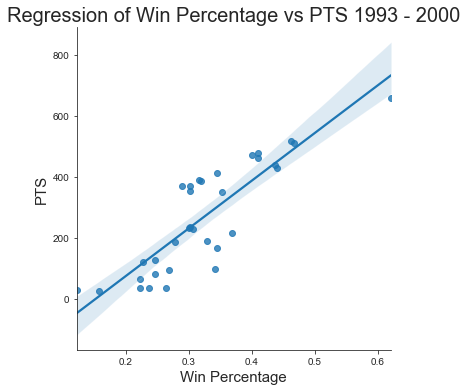

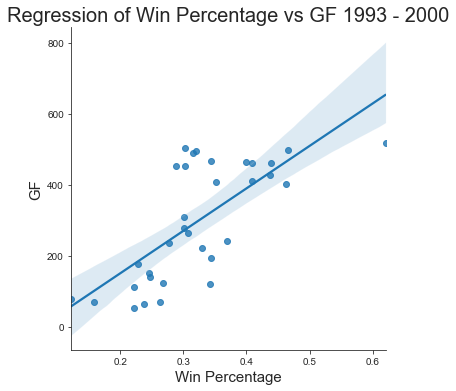

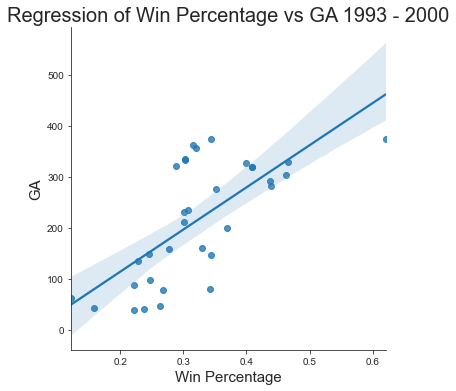

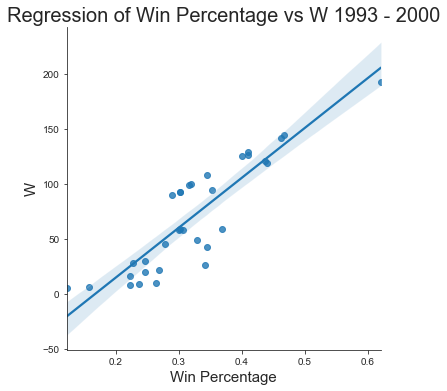

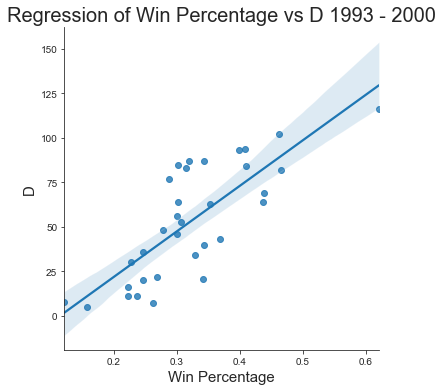

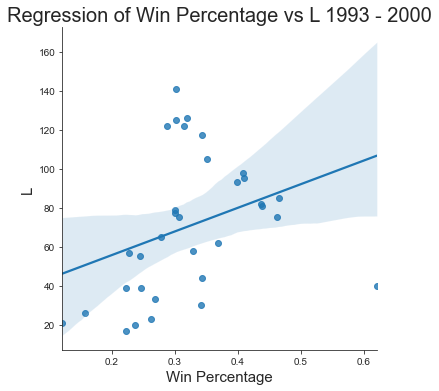

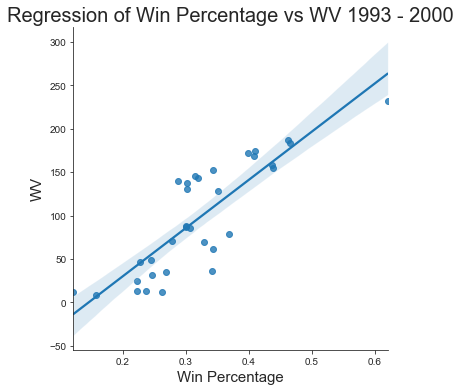

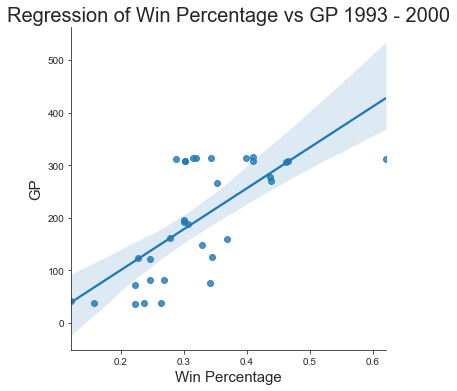

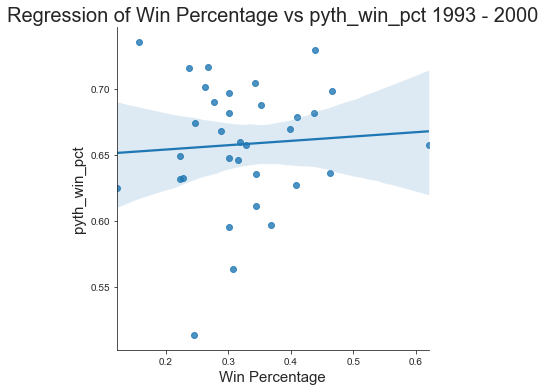

In [36]:
#Linear Model Plots between win pct vs all variables / features from 1993 - 2000
for feat in EPL_93.columns:
    if feat not in ['Team','win_pct']:
        sns.lmplot(x = 'win_pct', y = feat, data = EPL_93)
        plt.title(f"Regression of Win Percentage vs {feat} 1993 - 2000", fontsize = 20)
        plt.xlabel('Win Percentage', fontsize = 15)
        plt.ylabel(feat, fontsize = 15)

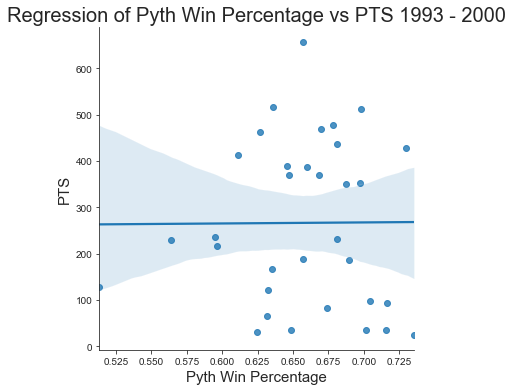

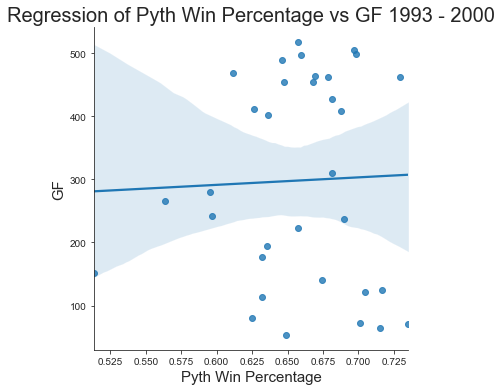

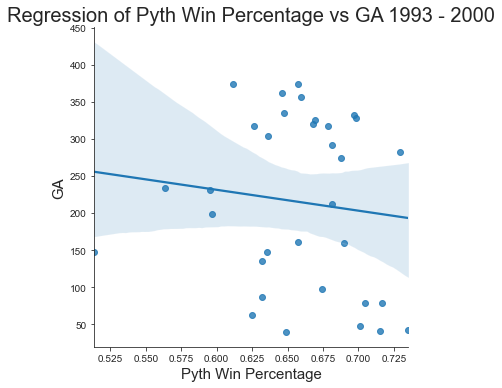

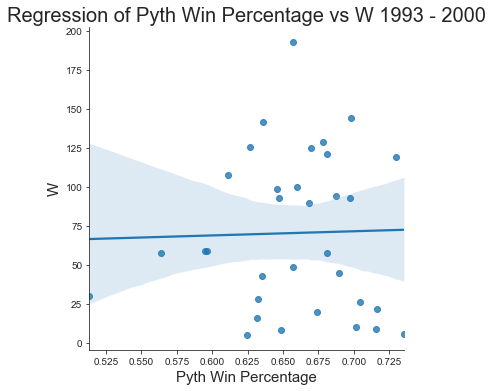

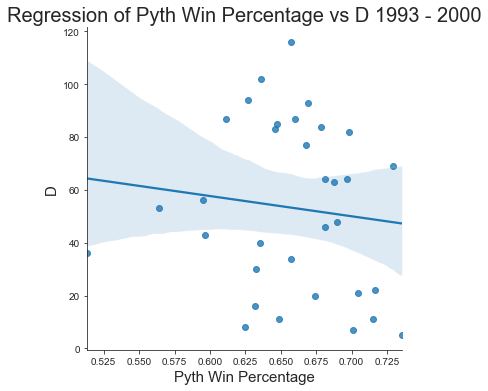

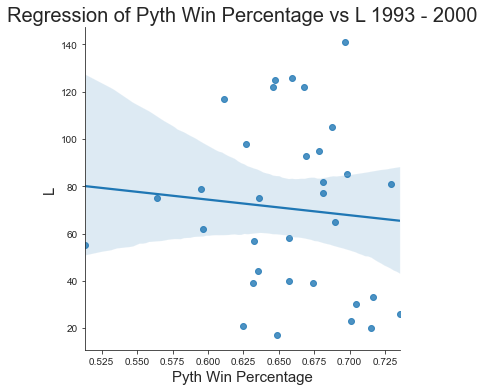

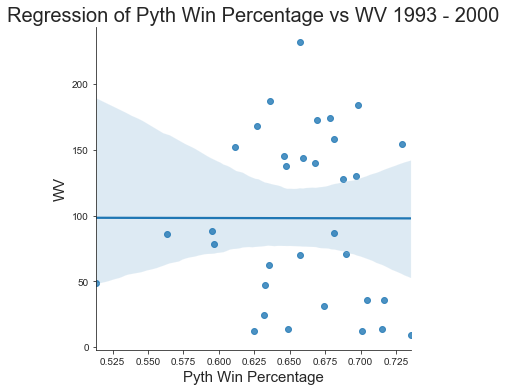

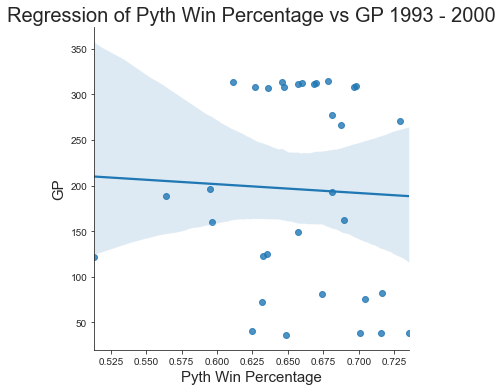

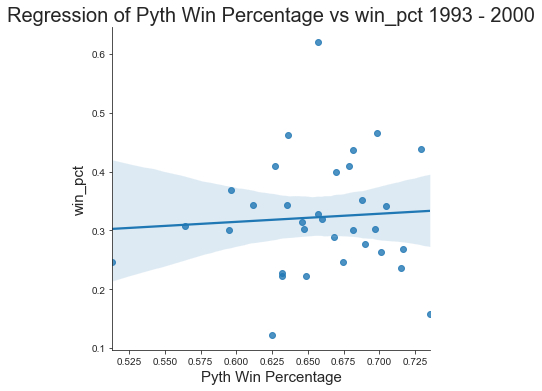

In [37]:
for feat in EPL_93.columns:
#Linear Model Plots between pyth. win pct vs all variables / features from 1993 - 2000
    if feat not in ['Team', 'pyth_win_pct']:
        sns.lmplot(x='pyth_win_pct', y=feat, data=EPL_93)
        plt.title(f"Regression of Pyth Win Percentage vs {feat} 1993 - 2000", fontsize=20)
        plt.xlabel('Pyth Win Percentage', fontsize=15)
        plt.ylabel(feat, fontsize=15)

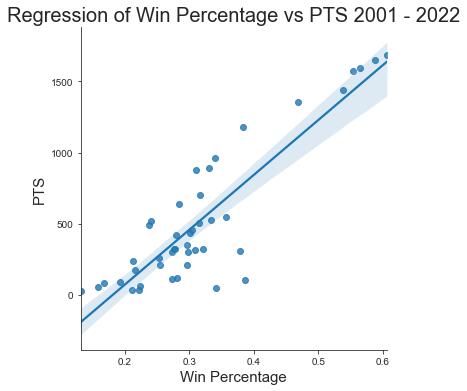

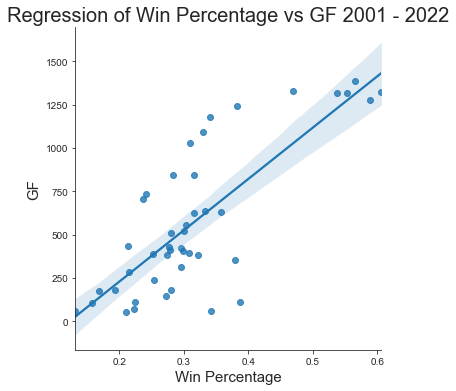

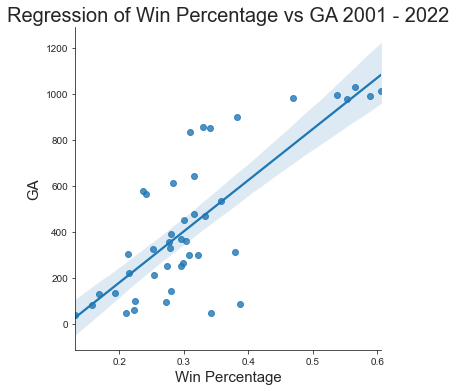

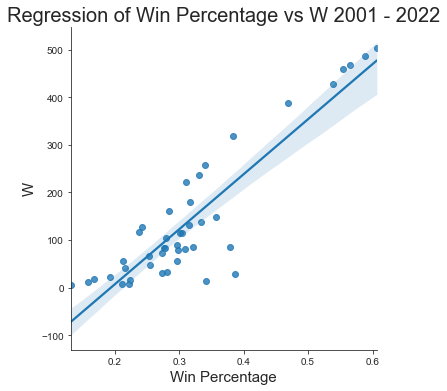

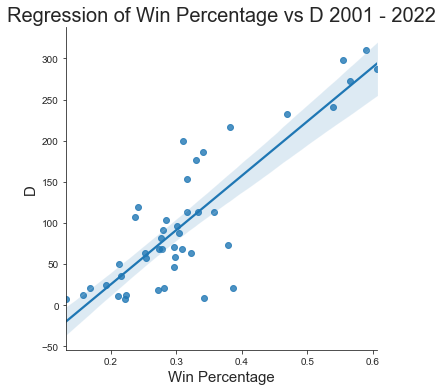

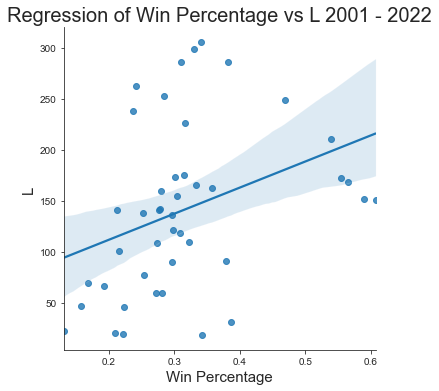

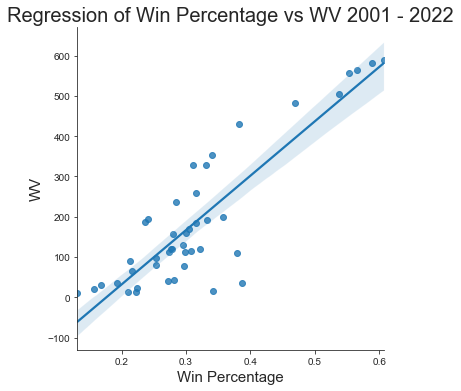

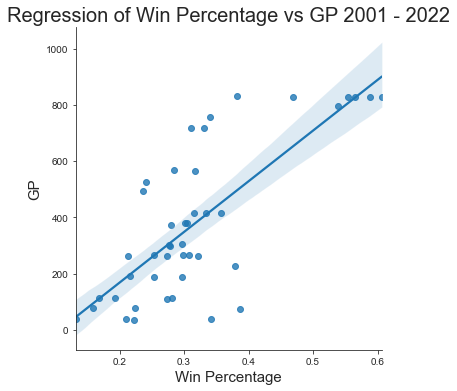

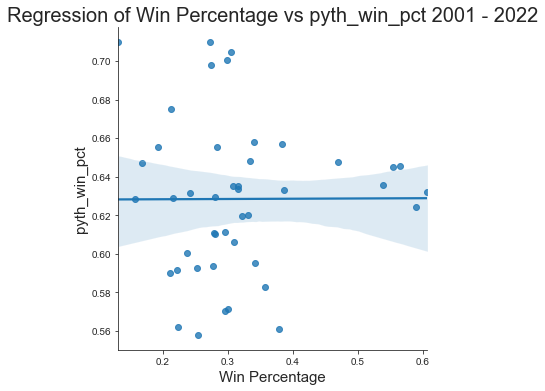

In [38]:
#Linear Model Plots between win pct vs all variables / features from 2001 - 2022
for feat in EPL_2001_2022.columns:
    if feat not in ['Team', 'win_pct']:
        sns.lmplot(x='win_pct', y=feat, data=EPL_2001_2022)
        plt.title(f"Regression of Win Percentage vs {feat} 2001 - 2022", fontsize=20)
        plt.xlabel('Win Percentage', fontsize=15)
        plt.ylabel(feat, fontsize=15)


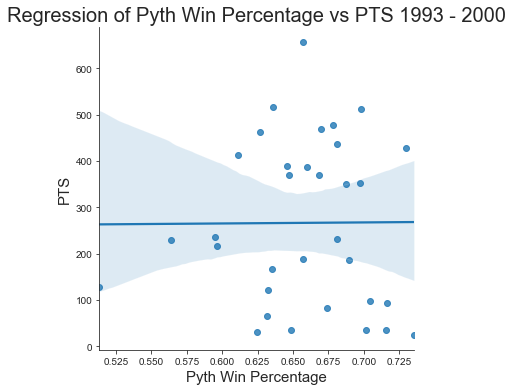

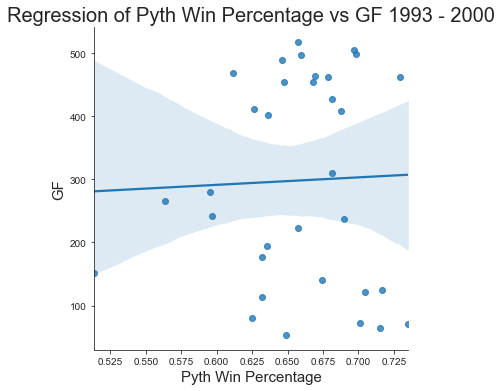

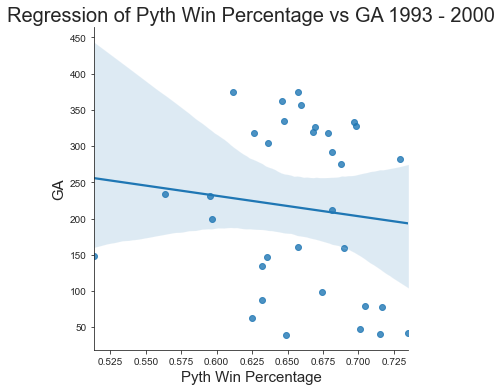

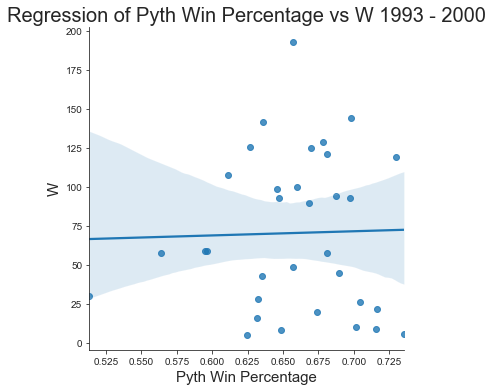

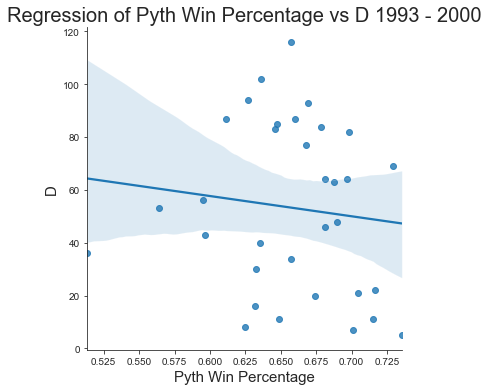

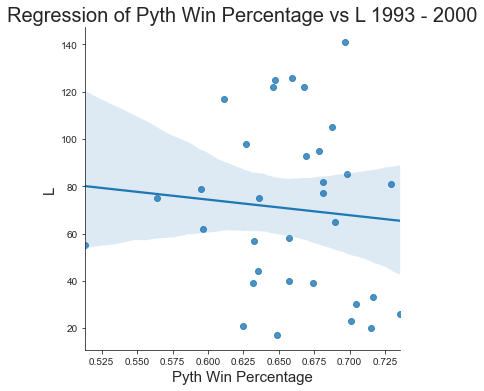

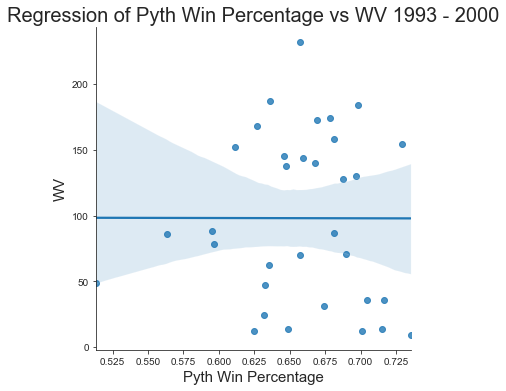

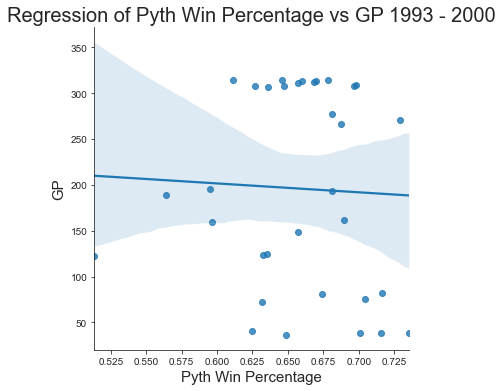

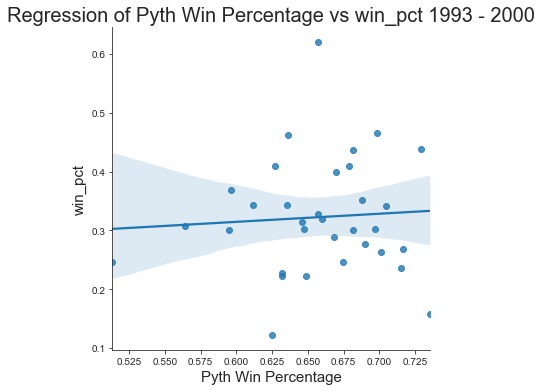

In [39]:
#Linear Model Plots between pyth. win pct vs all variables / features from 1993 - 2000
for feat in EPL_93.columns:
    if feat not in ['Team', 'pyth_win_pct']:
        sns.lmplot(x='pyth_win_pct', y=feat, data=EPL_93)
        plt.title(f"Regression of Pyth Win Percentage vs {feat} 1993 - 2000", fontsize=20)
        plt.xlabel('Pyth Win Percentage', fontsize=15)
        plt.ylabel(feat, fontsize=15)

### Regression Analysis

In [40]:
#Win_pct + pyth_win_pct (1993 - 2000)
reg1 = smf.ols(formula = 'win_pct ~ pyth_win_pct', data = EPL_93).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.1413
Date:                Sun, 01 Jan 2023   Prob (F-statistic):              0.710
Time:                        23:23:41   Log-Likelihood:                 30.367
No. Observations:                  33   AIC:                            -56.73
Df Residuals:                      31   BIC:                            -53.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2319      0.242      0.957   

In [41]:
#Win_pct + pyth_win_pct (2001 - 2022)
reg2 = smf.ols(formula='win_pct ~ pyth_win_pct', data=EPL_2001_2022).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                 0.0006044
Date:                Sun, 01 Jan 2023   Prob (F-statistic):              0.981
Time:                        23:23:41   Log-Likelihood:                 34.213
No. Observations:                  44   AIC:                            -64.43
Df Residuals:                      42   BIC:                            -60.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3093      0.275      1.123   

In [42]:
#Win_pct + GF (1993 - 2000)
reg3 = smf.ols(formula='win_pct ~ GF', data=EPL_93).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     32.09
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           3.19e-06
Time:                        23:23:42   Log-Likelihood:                 42.016
No. Observations:                  33   AIC:                            -80.03
Df Residuals:                      31   BIC:                            -77.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1957      0.026      7.675      0.0

In [43]:
#Win_pct + GF (2001- 2022)
reg4 = smf.ols(formula='win_pct ~ GF', data=EPL_2001_2022).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     65.71
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           3.98e-10
Time:                        23:23:42   Log-Likelihood:                 54.932
No. Observations:                  44   AIC:                            -105.9
Df Residuals:                      42   BIC:                            -102.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1982      0.018     10.966      0.0

In [44]:
#Win_pct + GF+GP (2001- 2022)
reg5_1 = smf.ols(formula='win_pct ~ GF+GP', data=EPL_93).fit()
print(reg5_1.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     15.54
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           2.34e-05
Time:                        23:23:42   Log-Likelihood:                 42.021
No. Observations:                  33   AIC:                            -78.04
Df Residuals:                      30   BIC:                            -73.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1958      0.026      7.550      0.0

In [45]:
#Win_pct + GF+GP (2001- 2022)
reg5 = smf.ols(formula='win_pct ~ GF+GP', data=EPL_2001_2022).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     47.35
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           2.21e-11
Time:                        23:23:42   Log-Likelihood:                 60.543
No. Observations:                  44   AIC:                            -115.1
Df Residuals:                      41   BIC:                            -109.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2220      0.018     12.672      0.0

In [46]:
#Win_pct + GF+GP (2001- 2022)
reg5__ = smf.ols(formula='win_pct ~ GF+GP+GA+WV+L+D', data=EPL_93).fit()
print(reg5__.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     35.06
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           2.92e-11
Time:                        23:23:42   Log-Likelihood:                 66.712
No. Observations:                  33   AIC:                            -119.4
Df Residuals:                      26   BIC:                            -108.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2414      0.015     16.508      0.0

In [47]:
#Win_pct + GF+GP (2001- 2022)
reg5__1 = smf.ols(formula='win_pct ~ GF+GP+GA+WV+L+D', data=EPL_2001_2022).fit()
print(reg5__1.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     39.09
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.47e-14
Time:                        23:23:43   Log-Likelihood:                 78.061
No. Observations:                  44   AIC:                            -142.1
Df Residuals:                      37   BIC:                            -129.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2485      0.015     16.477      0.0

In [48]:
#Win_pct + GF+ (2001- 2022)
reg6 = smf.wls(formula='win_pct ~ GF+GP+D',weight = 1 / EPL_2001_2022['PTS'] ,data=EPL_2001_2022).fit()
print(reg6.summary())

                            WLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.835
Model:                            WLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     67.70
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           9.99e-16
Time:                        23:23:43   Log-Likelihood:                 73.914
No. Observations:                  44   AIC:                            -139.8
Df Residuals:                      40   BIC:                            -132.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2425      0.014     17.884      0.0

In [49]:
#Win_pct + GF+ (2001- 2022)
reg6 = smf.wls(formula='win_pct ~ GF+GP+D', weight=1 / EPL_93['PTS'], data=EPL_93).fit()
print(reg6.summary())


                            WLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.706
Model:                            WLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     23.17
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           7.48e-08
Time:                        23:23:43   Log-Likelihood:                 50.469
No. Observations:                  33   AIC:                            -92.94
Df Residuals:                      29   BIC:                            -86.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2062      0.021     10.030      0.0